In [ ]:
#CONNEXION à google drive
import pandas as pd
from google.colab import drive

drive.mount('/Drive')
import re  

Mounted at /Drive


In [ ]:
#CHARGEMENT de la base WORD2VEC
import gensim
# set the correct path to the file on your machine
model = gensim.models.KeyedVectors.load_word2vec_format('/Drive/My Drive/Projet Rakuten/cc.fr.300.vec.gz', binary=False)


In [ ]:
path = '/Drive/My Drive/Projet Rakuten'
df = pd.read_csv(f'{path}/dataset_cleaned.csv', index_col=0) 

In [ ]:
#CHARGEMENT de la base WORD2VEC par spacy
#import spacy  # For preprocessing
#model_spacy = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed TODO check parameters

In [ ]:
model["piscine"].shape

(300,)

In [ ]:
model.most_similar('piscine')

[('piscines', 0.7429847717285156),
 ('piscinette', 0.7331039905548096),
 ('Piscine', 0.7146122455596924),
 ('pisicine', 0.7050917148590088),
 ('.piscine', 0.6966255307197571),
 ('piscine.', 0.6926317811012268),
 ('piscine-lagon', 0.6876533031463623),
 ('piscin', 0.6845397353172302),
 ('pisicne', 0.6833404302597046),
 ('piscine.La', 0.6822944283485413)]

In [ ]:
import numpy as np

#calculer la moyenne vectorielle d'une liste de mots
def get_mean_vector(word2vec_model, words):
  # remove out-of-vocabulary words
  words = [word for word in words if word in word2vec_model.vocab]
  if len(words) >= 1:
    return np.mean(word2vec_model[words], axis=0)
  else:
    return []
  

In [ ]:
from nltk.tokenize import word_tokenize
from time import time

t0 = time()
df_sample = df
# for j in range(300):
#   namecol="desi_vec_"+str(j)
#   namecol="desc_vec_"+str(j)
#   df_sample[namecol]=0
list_vecteurs_desi=[]
list_vecteurs_desc=[]
idxcoldesi = (df_sample.columns.get_loc("designation"))
idxcoldesc = (df_sample.columns.get_loc("description"))
listcols=["designation","description"]
#on parcourt les 2 champs texte
for indexcol in range(2):
  idxcol=df_sample.columns.get_loc(listcols[indexcol])
  #on parcourt tous les articles
  for indexligne in range(len(df_sample)):       
    #on récupère la valeur du champ pour l article 
    champ = df_sample.iloc[indexligne, idxcol]
    #on calcule la moyenne des vecteurs mots du champ de l article
    vecavg_300 = get_mean_vector(model, champ)
    #on ajoute les vecteurs dans la liste de vecteurs pour un des 2 champs
    if (indexcol==0):
      list_vecteurs_desi.append(vecavg_300)
    if (indexcol==1):
      list_vecteurs_desc.append(vecavg_300)
    
df_vecteurs_desi=pd.DataFrame(data=list_vecteurs_desi)
df_vecteurs_desc=pd.DataFrame(data=list_vecteurs_desc)
df_vecteurs_desc=df_vecteurs_desc.fillna(0)
df_vecteurs_desi=df_vecteurs_desi.fillna(0)
print('Time to clean up everything: {} mins'.format(round((time() - t0) / 60, 2)))

Time to clean up everything: 2.53 mins


In [ ]:
#ce df représente:
# dans les colonnes desi2vec_0 à desi2vec_299:
#     - la moyenne vectorielle des mots de l article sur chacune des 300 dimensions de word2vec
df_vecteurs_desi

,desi2vec_0,desi2vec_1,desi2vec_2,desi2vec_3,desi2vec_4,desi2vec_5,desi2vec_6,desi2vec_7,desi2vec_8,desi2vec_9,desi2vec_10,desi2vec_11,desi2vec_12,desi2vec_13,desi2vec_14,desi2vec_15,desi2vec_16,desi2vec_17,desi2vec_18,desi2vec_19,desi2vec_20,desi2vec_21,desi2vec_22,desi2vec_23,desi2vec_24,desi2vec_25,desi2vec_26,desi2vec_27,desi2vec_28,desi2vec_29,desi2vec_30,desi2vec_31,desi2vec_32,desi2vec_33,desi2vec_34,desi2vec_35,desi2vec_36,desi2vec_37,desi2vec_38,desi2vec_39,...,desi2vec_260,desi2vec_261,desi2vec_262,desi2vec_263,desi2vec_264,desi2vec_265,desi2vec_266,desi2vec_267,desi2vec_268,desi2vec_269,desi2vec_270,desi2vec_271,desi2vec_272,desi2vec_273,desi2vec_274,desi2vec_275,desi2vec_276,desi2vec_277,desi2vec_278,desi2vec_279,desi2vec_280,desi2vec_281,desi2vec_282,desi2vec_283,desi2vec_284,desi2vec_285,desi2vec_286,desi2vec_287,desi2vec_288,desi2vec_289,desi2vec_290,desi2vec_291,desi2vec_292,desi2vec_293,desi2vec_294,desi2vec_295,desi2vec_296,desi2vec_297,desi2vec_298,desi2vec_299
0,-0.12110,-0.0761,-0.0731,-0.04150,-0.04930,-0.1391,0.19750,-0.03840,-0.0752,-0.22640,0.00980,0.0813,-0.0680,0.04690,-0.01350,0.01310,-0.09180,-0.01250,-0.08650,0.10070,-0.0224,-0.0795,-0.0911,-0.04270,-0.04210,0.0702,0.05260,0.0062,-0.12050,0.0683,-0.1133,-0.04810,0.06370,0.02280,0.1102,0.1106,-0.22360,-0.0910,-0.0589,-0.0161,...,-0.04170,-0.1208,-0.2654,0.0411,-0.03290,0.0704,-0.05870,0.05940,-0.00750,0.00370,0.20950,-0.08090,0.04610,-0.26540,0.15730,0.0441,-0.0146,-0.01190,0.1464,-0.0645,0.2723,-0.09750,-0.02260,-0.10400,0.05060,0.00150,0.1136,-0.10010,-0.06910,-0.0253,-0.02080,-0.15410,0.05910,-0.03980,0.06680,-0.0100,0.02150,-0.17530,0.03650,0.0086
1,-0.07745,-0.0832,-0.1100,-0.05280,-0.08245,-0.1335,0.19750,-0.06050,-0.0567,-0.19260,0.00630,0.0708,-0.0430,0.03410,-0.01350,0.01465,-0.16610,0.00410,-0.08650,0.08650,-0.0179,-0.0869,-0.0698,-0.04270,-0.03290,0.0265,0.05760,-0.0560,-0.09630,0.0683,-0.1205,-0.03870,0.05575,0.02280,0.0986,0.1181,-0.22360,-0.0731,-0.0425,-0.0615,...,-0.10880,-0.0459,-0.2344,0.0411,-0.03290,0.0303,-0.04100,0.05165,-0.00795,0.01485,0.20940,-0.09375,0.05420,-0.24390,0.14500,0.0392,-0.0146,-0.00225,0.1464,-0.0645,0.2581,-0.06700,-0.02330,-0.10550,0.05070,-0.01880,0.0817,-0.09680,-0.06525,-0.0638,-0.03220,-0.15120,0.05910,-0.03980,0.06680,0.0442,0.03210,-0.17470,0.05180,0.0086
2,-0.12110,-0.0742,-0.0731,-0.05280,0.00440,-0.1391,0.19750,-0.03840,-0.0752,-0.31660,0.00630,0.0813,-0.0680,0.06190,-0.10350,0.01310,-0.16610,-0.04480,-0.08650,0.08650,-0.0310,-0.0795,-0.0911,-0.04270,-0.05940,0.0702,0.03660,0.0062,-0.12050,0.1483,-0.1133,-0.03870,0.06370,0.02280,0.1015,0.1106,-0.15610,-0.0858,-0.0425,-0.0108,...,-0.04170,-0.0182,-0.2990,0.0411,-0.06710,0.0704,-0.04100,0.05940,0.01040,0.01520,0.26300,-0.08090,-0.00510,-0.32320,0.14570,0.0553,-0.0361,-0.02630,0.1535,-0.0125,0.2723,-0.04120,-0.02260,-0.10400,0.05060,0.00150,0.1120,-0.10010,-0.06910,-0.0638,-0.00310,-0.15410,0.05100,-0.07600,-0.00600,-0.0100,0.02150,-0.17530,0.03650,0.0086
3,-0.06820,-0.0742,-0.0582,-0.09395,-0.18450,-0.1335,0.17020,-0.03840,-0.0567,-0.22205,0.00630,0.0708,-0.0508,0.04690,-0.06215,0.00210,-0.08520,-0.01570,-0.10195,0.08650,-0.0224,-0.0795,-0.0698,-0.02415,-0.04210,0.0265,0.03815,-0.0040,-0.05100,0.1081,-0.1133,-0.03850,0.05575,0.08390,0.0986,0.0945,-0.22260,-0.1217,-0.0425,-0.0161,...,-0.13485,-0.0377,-0.2344,0.0411,-0.03290,0.0548,-0.02930,0.07420,0.00420,0.01520,0.20480,-0.05960,-0.01415,-0.24390,0.13575,0.0333,-0.0146,-0.01190,0.1326,0.0000,0.1774,-0.04120,-0.02330,-0.08330,0.05365,-0.01630,0.1120,-0.07275,-0.06910,-0.0299,-0.01760,-0.14325,0.03955,-0.09310,0.06680,0.0442,0.03210,-0.17530,0.01490,0.0086
4,-0.10700,-0.0832,-0.1105,-0.04150,0.01240,-0.0391,0.23010,-0.06520,-0.0567,-0.14070,0.00630,0.0708,-0.0358,0.03410,-0.10350,0.13790,-0.17470,-0.04480,-0.08650,0.08650,-0.1506,-0.4293,-0.0504,-0.04270,-0.06600,0.0265,0.03260,-0.0649,-0.11630,0.1681,-0.1277,-0.09370,0.05370,-0.05690,0.1102,0.2798,-0.22260,-0.1263,-0.0485,-0.1357,...,-0.04170,-0.0182,-

In [ ]:
#TODO
#merge les 3 tableaux
#nommer les colonnes
nomscolonnes=[]
nomscolonnes2=[]
#on parcourt les 300 colonnes
for i in range(300):
  nomcolonne="desi2vec_"+str(i)
  nomscolonnes.append(nomcolonne)
  nomcolonne2="desc2vec_"+str(i)
  nomscolonnes2.append(nomcolonne2)

df_vecteurs_desi.columns=nomscolonnes
df_vecteurs_desc.columns=nomscolonnes2
  
df_vecteurs_600=pd.concat([df_vecteurs_desi, df_vecteurs_desc], axis=1, )#, suffixes=("_desc","_desi"))
df_vecteurs_600

,desi2vec_0,desi2vec_1,desi2vec_2,desi2vec_3,desi2vec_4,desi2vec_5,desi2vec_6,desi2vec_7,desi2vec_8,desi2vec_9,desi2vec_10,desi2vec_11,desi2vec_12,desi2vec_13,desi2vec_14,desi2vec_15,desi2vec_16,desi2vec_17,desi2vec_18,desi2vec_19,desi2vec_20,desi2vec_21,desi2vec_22,desi2vec_23,desi2vec_24,desi2vec_25,desi2vec_26,desi2vec_27,desi2vec_28,desi2vec_29,desi2vec_30,desi2vec_31,desi2vec_32,desi2vec_33,desi2vec_34,desi2vec_35,desi2vec_36,desi2vec_37,desi2vec_38,desi2vec_39,...,desc2vec_260,desc2vec_261,desc2vec_262,desc2vec_263,desc2vec_264,desc2vec_265,desc2vec_266,desc2vec_267,desc2vec_268,desc2vec_269,desc2vec_270,desc2vec_271,desc2vec_272,desc2vec_273,desc2vec_274,desc2vec_275,desc2vec_276,desc2vec_277,desc2vec_278,desc2vec_279,desc2vec_280,desc2vec_281,desc2vec_282,desc2vec_283,desc2vec_284,desc2vec_285,desc2vec_286,desc2vec_287,desc2vec_288,desc2vec_289,desc2vec_290,desc2vec_291,desc2vec_292,desc2vec_293,desc2vec_294,desc2vec_295,desc2vec_296,desc2vec_297,desc2vec_298,desc2vec_299
0,-0.108972,-0.056009,-0.061508,-0.023400,-0.097368,-0.106737,0.157587,-0.021180,-0.102203,-0.254640,-0.009280,0.042815,-0.037295,0.044052,-0.037899,0.018309,-0.107453,-0.021905,-0.077117,0.093121,-0.005120,-0.165636,-0.091176,-0.002703,-0.036040,0.029541,0.074835,-0.065396,-0.095152,0.107060,-0.115513,-0.056769,0.105569,0.061811,0.121984,0.161580,-0.224888,-0.038811,-0.069660,-0.036624,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.087030,-0.070980,-0.076955,-0.047868,-0.090720,-0.092589,0.148954,-0.043955,-0.094202,-0.213231,-0.020127,0.027816,-0.010021,0.032646,-0.040840,0.027245,-0.131973,-0.014482,-0.086998,0.081060,-0.013513,-0.192700,-0.065814,-0.001661,-0.028471,0.039138,0.080917,-0.098457,-0.097632,0.103430,-0.115443,-0.061423,0.081368,0.039698,0.109120,0.169368,-0.229424,-0.022283,-0.046805,-0.074120,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.122398,-0.050694,-0.053934,-0.032560,-0.110192,-0.125551,0.152355,0.007257,-0.115812,-0.265778,-0.014883,0.057123,-0.046917,0.057688,-0.061503,0.022443,-0.139554,-0.022538,-0.091814,0.107574,-0.041697,-0.188525,-0.091148,0.010748,-0.045106,0.063169,0.052968,-0.050931,-0.102114,0.102714,-0.098705,-0.070223,0.102552,0.051046,0.107754,0.181103,-0.195745,-0.033668,-0.053814,-0.037080,...,0.005508,-0.064366,-0.273830,0.048976,-0.076011,0.088185,-0.068400,0.055842,0.036466,0.020326,0.210936,-0.111805,0.028235,-0.282040,0.140586,0.039295,-0.030269,-0.052991,0.183747,-0.065131,0.213274,-0.087748,-0.020515,-0.043059,0.064705,0.013231,0.079705,-0.115650,-0.017267,-0.065073,0.031298,-0.162567,0.017421,-0.055946,0.071650,0.012625,0.004540,-0.159834,0.023633,0.036698
3,-0.061072,-0.062022,-0.052950,-0.052520,-0.132035,-0.109335,0.105822,-0.006719,-0.096154,-0.236587,-0.007122,0.035439,-0.036598,0.060144,-0.052898,-0.002835,-0.113894,-0.016476,-0.078607,0.085113,-0.021272,-0.171009,-0.080059,0.019757,-0.028148,0.023406,0.079820,-0.073137,-0.071941,0.097672,-0.118800,-0.041804,0.062648,0.069370,0.092237,0.153939,-0.242794,-0.034285,-0.032650,-0.027457,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
df_vecteurs_600.describe().T

,count,mean,std,min,25%,50%,75%,max
desi2vec_0,84916.0,-0.102980,0.024473,-0.217111,-0.119147,-0.104896,-0.088950,0.081168
desi2vec_1,84916.0,-0.060422,0.016577,-0.185924,-0.070037,-0.059935,-0.050022,0.050820
desi2vec_2,84916.0,-0.067925,0.021415,-0.192933,-0.081499,-0.068208,-0.054684,0.076992
desi2vec_3,84916.0,-0.035387,0.019483,-0.149000,-0.047485,-0.035800,-0.023624,0.130729
desi2vec_4,84916.0,-0.101345,0.031384,-0.280726,-0.120346,-0.100361,-0.081387,0.067633
...,...,...,...,...,...,...,...,...
desc2vec_295,84916.0,0.014611,0.024399,-0.365300,0.000000,0.008466,0.023481,0.522450
desc2vec_296,84916.0,0.007853,0.009352,-0.079133,0.000000,0.006624,0.012714,0.240600
desc2vec_297,84916.0,-0.111409,0.085767,-0.694700,-0.171631,-0.152977,0.000000,0.000000
desc2vec_298,84916.0,0.015526,0.014585,-0.193700,0.000000,0.018801,0.027712,0.164400


In [ ]:
#NOT USED
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [ ]:
print(df_sample)

                                             designation  ... desi_vec_299
0      olivia: personalisiertes notizbuch / 150 seite...  ...            0
1      journal des arts (le) n° 133 du 28/09/2001 - l...  ...            0
2      grand stylet ergonomique bleu gamepad nintendo...  ...            0
3      peluche donald - europe - disneyland 2000 (mar...  ...            0
4                                   la guerre des tuques  ...            0
...                                                  ...  ...          ...
84911                        the sims [ import anglais ]  ...            0
84912  kit piscine acier nevada déco pierre ø 3.50m x...  ...            0
84913  journal officiel de la republique francaise n°...  ...            0
84914  table basse bois de récupération massif base b...  ...            0
84915  gomme de collection 2 gommes pinguin glace ver...  ...            0

[84916 rows x 304 columns]


In [ ]:
path = '/Drive/My Drive/Projet Rakuten'
df_vecteurs_600.to_csv(f'{path}/word2vec_600.csv')

In [ ]:
path = '/Drive/My Drive/Projet Rakuten'
df_vecteurs_600 = pd.read_csv(f'{path}/word2vec_600.csv')
df_global = pd.read_csv("/Drive/My Drive/Projet Rakuten/data_features_final.csv", index_col=1) 
y=df_global["prdtypecode"]
#X=df_global.drop(["blanc","noir","R","G","B","best_idf","Unnamed: 0","Unnamed: 0.1","designation","description","prdtypecode.1","imageid","prdtypecode"], axis=1)
X=df_vecteurs_600#df_global.drop(["best_idf","Unnamed: 0","Unnamed: 0.1","designation","description","prdtypecode.1","imageid","prdtypecode"], axis=1)
print(X.shape)
print(df_vecteurs_600)
#X=pd.concat([X, df_vecteurs_600], axis=1)
#X.info()

(84916, 601)
       Unnamed: 0  desi2vec_0  ...  desc2vec_298  desc2vec_299
0               0   -0.108972  ...      0.000000      0.000000
1               1   -0.087030  ...      0.000000      0.000000
2               2   -0.122398  ...      0.023633      0.036698
3               3   -0.061072  ...      0.000000      0.000000
4               4   -0.108118  ...      0.042181      0.036844
...           ...         ...  ...           ...           ...
84911       84911   -0.138609  ...      0.000000      0.000000
84912       84912   -0.099207  ...      0.014871      0.018043
84913       84913   -0.103854  ...      0.000000      0.000000
84914       84914   -0.105927  ...      0.034619      0.026065
84915       84915   -0.113565  ...      0.000000      0.000000

[84916 rows x 601 columns]


In [ ]:
#Standardisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
#X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size = 0.2, stratify = y_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Nombre de composantes retenues : 24
Time to clean up everything: 0.16 mins


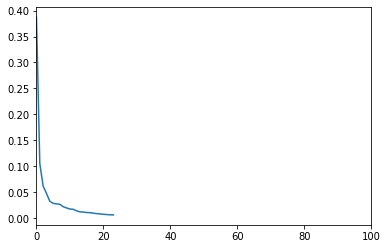

In [ ]:
#REDUCTION ACP
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from time import time

t0 = time()
pca = PCA(n_components = 0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.figure()
plt.xlim(0,100)
plt.plot(pca.explained_variance_ratio_);
print("Nombre de composantes retenues :", pca.n_components_)
print('Time to clean up everything: {} mins'.format(round((time() - t0) / 60, 2)))

In [ ]:
#MODELES
t0 = time()
clf = RandomForestClassifier(n_jobs=-1)#random_state=22, n_jobs=-1, criterion = 'entropy',max_features = 'sqrt', min_samples_leaf = 1, n_estimators=250)
clf.fit(X_train_pca, y_train)
print("Score RF:",clf.score(X_test_pca, y_test))
print('Time for RF : {} mins'.format(round((time() - t0) / 60, 2)))

Score RF: 0.49740932642487046
Time to clean up everything: 0.71 mins


In [ ]:
#GRIDSEARCH
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
import numpy as np
pd.set_option('display.expand_frame_repr', False)

clf_lr = LogisticRegression(multi_class = 'ovr',solver= 'lbfgs',random_state = 22, max_iter=2000,n_jobs=-1)
C = np.logspace(-4,2,4)
#LOGISTIC REG
param_lr = {'penalty': ['l1','l2'], 'C': [0.001,1,1000]}
gridcv_lr = GridSearchCV(clf_lr, param_grid=  param_lr, scoring= 'accuracy', cv = 3)
from time import time
t0 = time()
gridcv_lr.fit(X_train_pca, y_train)
pd.DataFrame(gridcv_lr.cv_results_)[['params', 'mean_test_score' , 'std_test_score']]
print(f'Best Score: {gridcv_lr.best_params_}')
print(f'Best Parameters: {gridcv_lr.best_score_}')
print('Time to process: {} mins'.format(round((time() - t0) / 60, 2)))
pd.DataFrame(gridcv_lr.cv_results_)[['params', 'mean_test_score' , 'std_test_score']]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


Best Score: {'C': 1, 'penalty': 'l2'}
Best Parameters: 0.358122828711064
Time to process: 2.09 mins


,params,mean_test_score,std_test_score
0,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN
1,"{'C': 0.001, 'penalty': 'l2'}",0.351131,0.004128
2,"{'C': 1, 'penalty': 'l1'}",NaN,NaN
3,"{'C': 1, 'penalty': 'l2'}",0.358123,0.005328
4,"{'C': 1000, 'penalty': 'l1'}",NaN,NaN
5,"{'C': 1000, 'penalty': 'l2'}",0.358108,0.005324


In [ ]:
#RANDOM FOREST
param_rf= { 
    'n_estimators': [500],# [200, 500]
    'max_features': ['sqrt'], #, 'log2','auto', 
    'max_depth' : [8],#4,6,8],
    'criterion' :['entropy']#'gini', 
}
clf_rf = RandomForestClassifier(n_jobs=-1)
gridcv_rf = GridSearchCV(clf_rf, param_grid=  param_rf, scoring= 'accuracy', cv = 2)
t0 = time()
gridcv_rf.fit(X_train_pca, y_train)
pd.DataFrame(gridcv_rf.cv_results_)[['params', 'mean_test_score' , 'std_test_score']]
print(f'Best Parameters: {gridcv_rf.best_params_}')
print(f'Best Score: {gridcv_rf.best_score_}')
print('Time to process: {} mins'.format(round((time() - t0) / 60, 2)))

pd.DataFrame(gridcv_rf.cv_results_)[['params', 'mean_test_score' , 'std_test_score']]

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}
Best Score: 0.3462727433315669
Time to process: 26.11 mins


,params,mean_test_score,std_test_score
0,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.346273,0.002458


In [ ]:
#KNN

param_grid = {
    'n_neighbors': (1,10, 50),
    'leaf_size': (20,40), #20 40 1
}
#    'p': (1,2),
#    'weights': ('uniform', 'distance'),
#    'metric': ('minkowski', 'chebyshev'),
                   
# with GridSearch


#print (param_grid)
knn = KNeighborsClassifier(n_jobs=-1)

clf_knn = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
gridcv_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 3
)

t0 = time()
gridcv_knn.fit(X_train_pca, y_train)

print(f'Best Parameters: {gridcv_knn.best_params_}')
print(f'Best score: {gridcv_knn.best_score_}')
print('Time to process: {} mins'.format(round((time() - t0) / 60, 2)))

pd.DataFrame(gridcv_knn.cv_results_)[['params', 'mean_test_score' , 'std_test_score']]
#Best score: 0.524146474060105

Best Parameters: {'leaf_size': 20, 'n_neighbors': 1}
Best score: 0.4677766001295413
Time to process: 10.68 mins


,params,mean_test_score,std_test_score
0,"{'leaf_size': 20, 'n_neighbors': 1}",0.467777,0.004222
1,"{'leaf_size': 20, 'n_neighbors': 10}",0.449847,0.004637
2,"{'leaf_size': 20, 'n_neighbors': 50}",0.412442,0.002286
3,"{'leaf_size': 40, 'n_neighbors': 1}",0.467777,0.004222
4,"{'leaf_size': 40, 'n_neighbors': 10}",0.449847,0.004637
5,"{'leaf_size': 40, 'n_neighbors': 50}",0.412442,0.002286


In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict ( X_test_pca )
df_cross=pd.crosstab ( y_test, y_pred, rownames = ['Classe réelle'], colnames = ['Classe prédite'], normalize=0)
classif = classification_report(y_test, y_pred)
print(classif)

              precision    recall  f1-score   support

          10       0.25      0.34      0.29       624
          40       0.54      0.27      0.36       523
          50       0.63      0.21      0.32       313
          60       0.88      0.64      0.74       152
        1140       0.36      0.20      0.26       517
        1160       0.45      0.68      0.54       744
        1180       0.64      0.06      0.11       157
        1280       0.34      0.30      0.32      1015
        1281       0.40      0.09      0.14       394
        1300       0.63      0.69      0.66      1058
        1301       0.94      0.52      0.67       157
        1302       0.62      0.36      0.46       508
        1320       0.58      0.29      0.38       642
        1560       0.40      0.57      0.47       993
        1920       0.73      0.70      0.72       840
        1940       0.89      0.10      0.18       157
        2060       0.45      0.55      0.49      1026
        2220       1.00    

In [ ]:
from time import time

t0 = time()# from sklearn.feature_selection import SelectKBest
# sel = SelectKBest(score_func = f_regression, k=)
# sel.fit(X_train, y_train)
# mask = sel.get_support()
# plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
# plt.xlabel('Axe des features');
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=22, n_jobs=-1, criterion = 'entropy',max_features = 'sqrt', min_samples_leaf = 1, n_estimators=250)
clf.fit ( X_train, y_train)
print('Time to clean up everything: {} mins'.format(round((time() - t0) / 60, 2))) #10:44

Time to clean up everything: 44.72 mins


In [ ]:
y_pred = clf.predict ( X_test )
df_cross=pd.crosstab ( y_test, y_pred, rownames = ['Classe réelle'], colnames = ['Classe prédite'], normalize=0)
classif = classification_report(y_test, y_pred)
print(classif)

ValueError: ignored

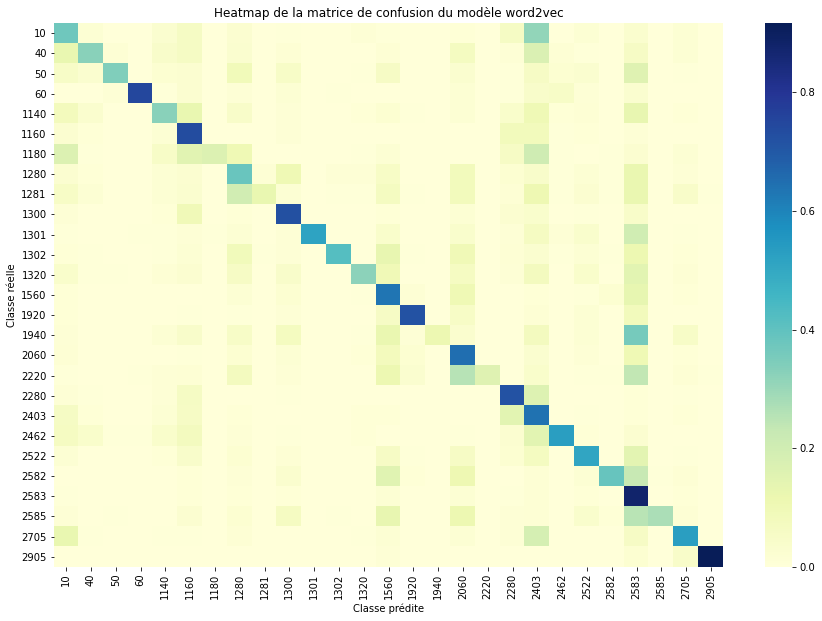

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df_cross, cmap='YlGnBu');
p = plt.title("Heatmap de la matrice de confusion du modèle word2vec");
images_dir = '/Drive/My Drive/Projet Rakuten'
plt.savefig(f"{images_dir}/Heatmap_word2vec1_rf2.png")

In [ ]:
df_sample.head(10)

,designation,description,productid,prdtypecode
0,olivia: personalisiertes notizbuch / 150 seite...,,3804725264,10
1,journal des arts (le) n° 133 du 28/09/2001 - l...,,436067568,2280
2,grand stylet ergonomique bleu gamepad nintendo...,pilot style touch pen de marque speedlink est ...,201115110,50
3,peluche donald - europe - disneyland 2000 (mar...,,50418756,1280
4,la guerre des tuques,luc a des idées de grandeur. il veut organiser...,278535884,2705
5,afrique contemporaine n° 212 hiver 2004 - doss...,,5862738,2280
6,christof e: bildungsprozessen auf der spur,,91920807,10
7,conquérant sept cahier couverture polypro 240 ...,conquerant classique cahier 240 x 320 mm seyès...,344240059,2522
8,puzzle scooby-doo avec poster 2x35 pieces,,4239126071,1280
9,tente pliante v3s5-pro pvc blanc - 3 x 4m50 - ...,tente pliante v3s5 pro pvc 500 gr/m² - 3 x 4m5...,3793572222,2582


In [ ]:
df_global.head(10)

,Unnamed: 0,prdtypecode,blanc,noir,R,G,B,Unnamed: 0.1,designation,description,desc_length,desi_length,desi_nb_phrases,desc_nb_phrases,desi_nb_mots+,desc_nb_mots+,best_idf,class_10,class_40,class_50,class_60,class_1140,class_1160,class_1180,class_1280,class_1281,class_1300,class_1301,class_1302,class_1320,class_1560,class_1920,class_1940,class_2060,class_2220,class_2280,class_2403,class_2462,class_2522,class_2582,class_2583,class_2585,class_2705,class_2905,desc_nb2chiffres+,desc_num,desc_poids,desc_long,desc_vol,desc_ans_mois,desc_pieces,desc_pourcent,imageid,prdtypecode.1,desi_word_count,desi_char_count,desi_word_density,desi_total_length,desi_capitals,desi_num_exclamation_marks,desi_num_question_marks,desi_num_punctuation,desi_num_symbols,desi_num_unique_words,desi_words_vs_unique,desi_word_unique_percent,descri_word_count,descri_char_count,descri_word_density,descri_total_length,descri_capitals,descri_num_exclamation_marks,descri_num_question_marks,descri_num_punctuation,descri_num_symbols,descri_num_unique_words,descri_words_vs_unique,descri_word_unique_percent,desi_char_count (w/o space),descri_char_count (w/o space)
productid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3804725264,0,10,0.896177,0.000007,251.471600,246.764924,246.580288,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,0,88,1,0,10,0,class_2522,0.000,0.000,0.00,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.157,0.114,0.000,0.00,0.0,0.0,0.000,0.000,0.000,0.191,0.000,0.0,0.115,0.000,0.021,0,0,0,0,0,0,0,0,1263597046,10,14,75,0.184211,88,10,0,0,1,5,11,0.785714,78.571429,1,3,0.250000,3,0,0,0,0,0,1,1.000000,100.000000,75,3
436067568,1,2280,0.804087,0.000235,233.710580,232.696360,231.392644,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,0,206,1,0,33,0,class_2280,0.306,0.000,0.00,0.0,0.000,0.131,0.0,0.176,0.000,0.338,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.837,0.000,0.000,0.272,0.000,0.0,0.000,0.000,0.000,0,0,0,0,0,0,0,0,1008141237,2280,39,168,0.230769,206,32,0,0,1,7,34,0.871795,87.179487,1,3,0.250000,3,0,0,0,0,0,1,1.000000,100.000000,168,3
201115110,2,50,0.925060,0.000000,249.340400,251.500820,253.409132,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,686,76,1,3,10,72,class_2462,0.000,0.100,0.48,0.0,0.000,0.000,0.0,0.000,0.274,0.000,0.0,0.0,0.144,0.000,0.000,0.26,0.0,0.0,0.000,0.644,0.657,0.212,0.000,0.0,0.000,0.000,0.020,1,0,0,0,0,0,0,0,938777978,50,12,65,0.181818,76,11,0,0,0,1,12,1.000000,100.000000,109,652,0.166922,760,61,0,0,10,0,88,0.807339,80.733945,65,652
50418756,3,1280,0.476548,0.000221,169.924608,152.227476,149.065240,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,0,63,1,0,7,0,class_1280,0.000,0.000,0.00,0.0,0.000,0.000,0.0,0.222,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0,0,0,0,0,0,0,0,457047496,1280,10,54,0.181818,63,7,0,0,0,2,9,0.900000,90.000000,1,3,0.250000,3,0,0,0,0,0,1,1.000000,100.000000,54,3
278535884,4,2705,0.781337,0.003199,225.403116,234.072128,238.177512,4,La Guerre Des Tuques,Luc a des idées de grandeur. Il veut organiser...,187,20,1,3,4,22,class_2705,0.000,0.000,0.00,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.111,0.000,0,0,0,0,0,0,0,0,1077757786,2705,4,17,0.222222,20,4,0,0,0,0,4,1.000000,100.000000,34,180,0.187845,213,4,0,0,9,4,30,0.882353,88.235294,17,180
5862738,5,2280,0.383107,0.001941,246.999440,186.372528,134.091996,5,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,NaN,0,65,1,0,9,0,class_1160,0.000,0.189,0.00,0.0,0.000,0.262,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.158,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.021,0,0,0,0,0,0,0,0,393356830,2280,11,55,0.196429,65,7,0,0,0,2,10,0.909091,90.909091,1,3,0.250000,3,0,0,0,0,0,1,1.000000,100.000000,55,3
91920807,6,10,0.819935,0.000523,214.435596,214.648956,214.457600,6,Christof E: Bildungsprozessen Auf Der Spur,NaN,0,42,1,